# Coding Discussion 6
## Chau Nguyen

#### Modules

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

### Data

In [93]:
# Read in training data
dat = pd.read_csv("../train_data.csv")

### Explore the training data

In [94]:
# Data shape
dat.shape

(43590, 39)

<AxesSubplot:>

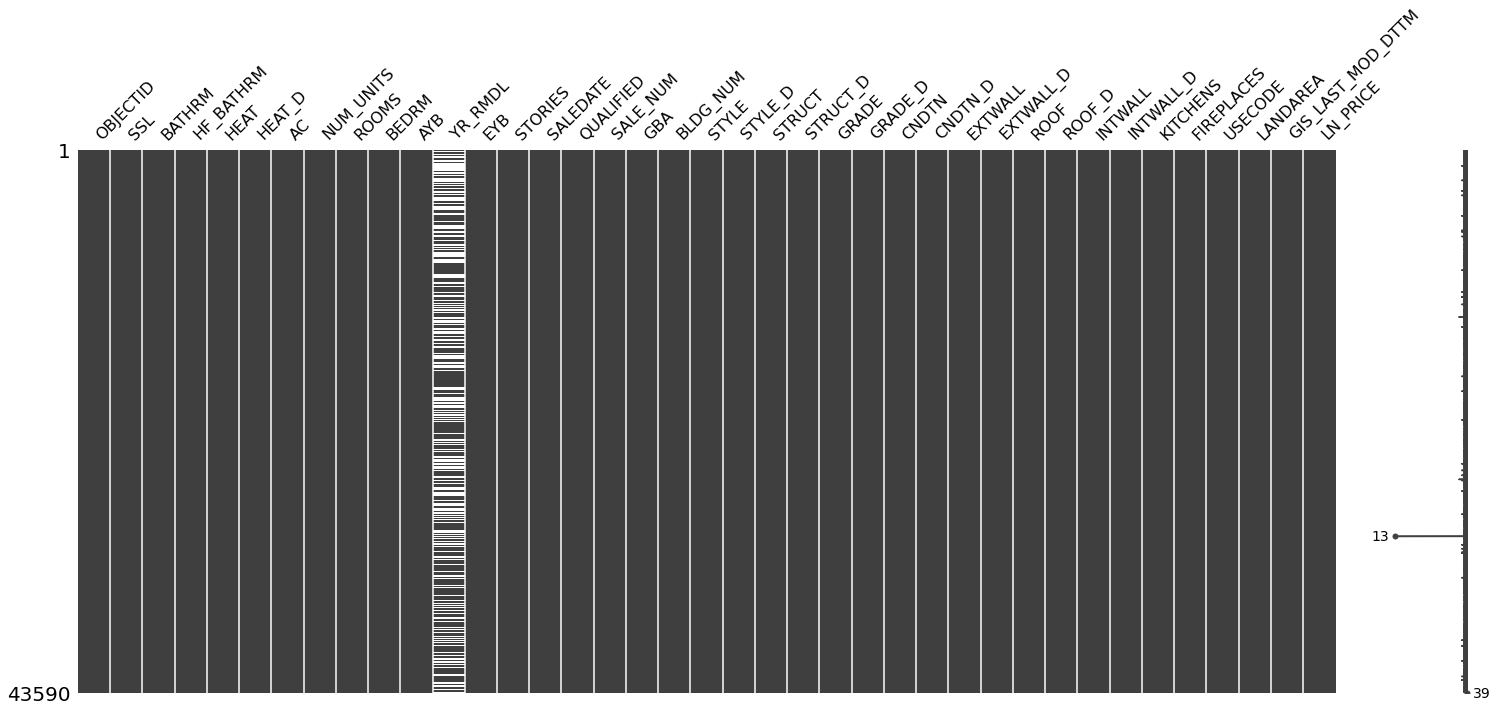

In [95]:
# Check for missing data
miss.matrix(dat)

In [96]:
# Count number of missing rows for each column
dat.isna().sum()

OBJECTID                 0
SSL                      0
BATHRM                   1
HF_BATHRM                2
HEAT                     1
HEAT_D                   1
AC                       1
NUM_UNITS                1
ROOMS                   11
BEDRM                    4
AYB                      4
YR_RMDL              18583
EYB                      0
STORIES                 29
SALEDATE                 0
QUALIFIED                0
SALE_NUM                 0
GBA                      0
BLDG_NUM                 0
STYLE                    1
STYLE_D                  1
STRUCT                   1
STRUCT_D                 1
GRADE                    1
GRADE_D                  1
CNDTN                    1
CNDTN_D                  1
EXTWALL                  1
EXTWALL_D                1
ROOF                     1
ROOF_D                   1
INTWALL                  1
INTWALL_D                1
KITCHENS                 2
FIREPLACES               1
USECODE                  0
LANDAREA                 0
G

In [97]:
# Summary statistics
dat.describe()

,OBJECTID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,LN_PRICE
count,43590.000000,43589.000000,43588.000000,43589.000000,43589.000000,43579.000000,43586.000000,43586.000000,25007.000000,43590.000000,...,43589.000000,43589.000000,43589.000000,43589.000000,43589.000000,43588.000000,43589.000000,43590.000000,43590.000000,43590.000000
mean,52159.470452,2.203331,0.649697,6.853954,1.220675,7.424815,3.428073,1931.199422,2004.274683,1969.804313,...,4.297116,3.706348,13.467756,3.960839,6.302049,1.250551,0.639014,13.268640,3175.001078,12.927904
std,31134.869767,1.068895,0.608786,5.151037,0.624555,2.334643,1.163447,86.229606,17.783975,16.926513,...,1.373435,0.746981,4.045380,3.334032,2.098208,0.669050,0.905193,4.170675,3200.666743,0.865822
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,24534.250000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1913.000000,2002.000000,1957.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1520.000000,12.388394
50%,51708.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,2008.000000,1967.000000,...,4.000000,4.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2212.000000,12.994530
75%,79542.750000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2013.000000,1975.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4000.000000,13.527828
max,107154.000000,24.000000,11.000000,13.000000,6.000000,36.000000,54.000000,2018.000000,2019.000000,2018.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,39.000000,187301.000000,17.038378


### Pre-process the data

In [98]:
# Define function to create a dummy for whether the property has been remodeled or not
def rmdl(df):
    '''
    This function takes in one argument, which is the dataframe
    It creates a dummy variable RMDL that takes value 0 if YR_RMDL is missing, and 1 if not
    '''
    df["RMDL"] = ""
    df.loc[df.YR_RMDL.isnull(), "RMDL"] = 0
    df.loc[df.YR_RMDL.notnull(), "RMDL"] = 1
    

In [99]:
# Run the rmdl function
rmdl(dat)

In [100]:
# Summary statistics for variables of interest
dat[["BATHRM","HF_BATHRM","BEDRM","EYB","RMDL","LANDAREA","KITCHENS","HEAT"]].describe()

,BATHRM,HF_BATHRM,BEDRM,EYB,LANDAREA,KITCHENS,HEAT
count,43589.000000,43588.000000,43586.000000,43590.000000,43590.000000,43588.000000,43589.000000
mean,2.203331,0.649697,3.428073,1969.804313,3175.001078,1.250551,6.853954
std,1.068895,0.608786,1.163447,16.926513,3200.666743,0.669050,5.151037
min,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,1957.000000,1520.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,1967.000000,2212.000000,1.000000,7.000000
75%,3.000000,1.000000,4.000000,1975.000000,4000.000000,1.000000,13.000000
max,24.000000,11.000000,54.000000,2018.000000,187301.000000,44.000000,13.000000


In [101]:
#### Drop where the variables of interest are missing
dat = dat[["BATHRM","HF_BATHRM","BEDRM","EYB","RMDL","LANDAREA","KITCHENS","HEAT","LN_PRICE"]].dropna()


In [102]:
# Create train_X dataset with the variables of interest above
train_X = dat[["BATHRM","HF_BATHRM","BEDRM","EYB","RMDL","LANDAREA","KITCHENS","HEAT"]]
train_X.isna().sum()
#train_X = dat[["BATHRM","HF_BATHRM","BEDRM","EYB","YR_RMDL","RMDL"]]

BATHRM       0
HF_BATHRM    0
BEDRM        0
EYB          0
RMDL         0
LANDAREA     0
KITCHENS     0
HEAT         0
dtype: int64

### Pre-process train_X

In [223]:
# Scale the variables in train_X
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [104]:
# Convert back to a df
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,BATHRM,HF_BATHRM,BEDRM,EYB,RMDL,LANDAREA,KITCHENS,HEAT
0,0.125000,0.090909,0.074074,0.584746,1.0,0.011927,0.022727,0.076923
1,0.083333,0.090909,0.055556,0.610169,0.0,0.020555,0.022727,0.538462
2,0.083333,0.181818,0.074074,0.677966,1.0,0.041997,0.022727,1.000000
3,0.041667,0.090909,0.055556,0.440678,0.0,0.014624,0.022727,0.538462
4,0.083333,0.000000,0.074074,0.423729,1.0,0.011196,0.022727,1.000000
...,...,...,...,...,...,...,...,...
43579,0.041667,0.000000,0.037037,0.483051,1.0,0.002990,0.022727,0.076923
43580,0.083333,0.090909,0.055556,0.584746,1.0,0.007918,0.022727,1.000000
43581,0.083333,0.000000,0.074074,0.483051,1.0,0.007437,0.022727,1.000000
43582,0.125000,0.090909,0.055556,0.711864,1.0,0.004688,0.045455,0.076923


In [105]:
train_X.columns

Index(['BATHRM', 'HF_BATHRM', 'BEDRM', 'EYB', 'RMDL', 'LANDAREA', 'KITCHENS',
       'HEAT'],
      dtype='object')

In [106]:
# train_y
train_y = dat[["LN_PRICE"]]

### K-fold cross validation

In [107]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)
use_metrics = ["neg_mean_squared_error"]

#### Linear model

In [108]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### K Nearest Neighbors

In [109]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### Decision Tree

In [110]:
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [112]:
train_y.isna().sum()

LN_PRICE    0
dtype: int64

#### Decision tree plot

In [122]:
mod = DTree(max_depth=5) # Initialize the modeling object (just as we did)
mod.fit(train_X,train_y) 

DecisionTreeRegressor(max_depth=5)

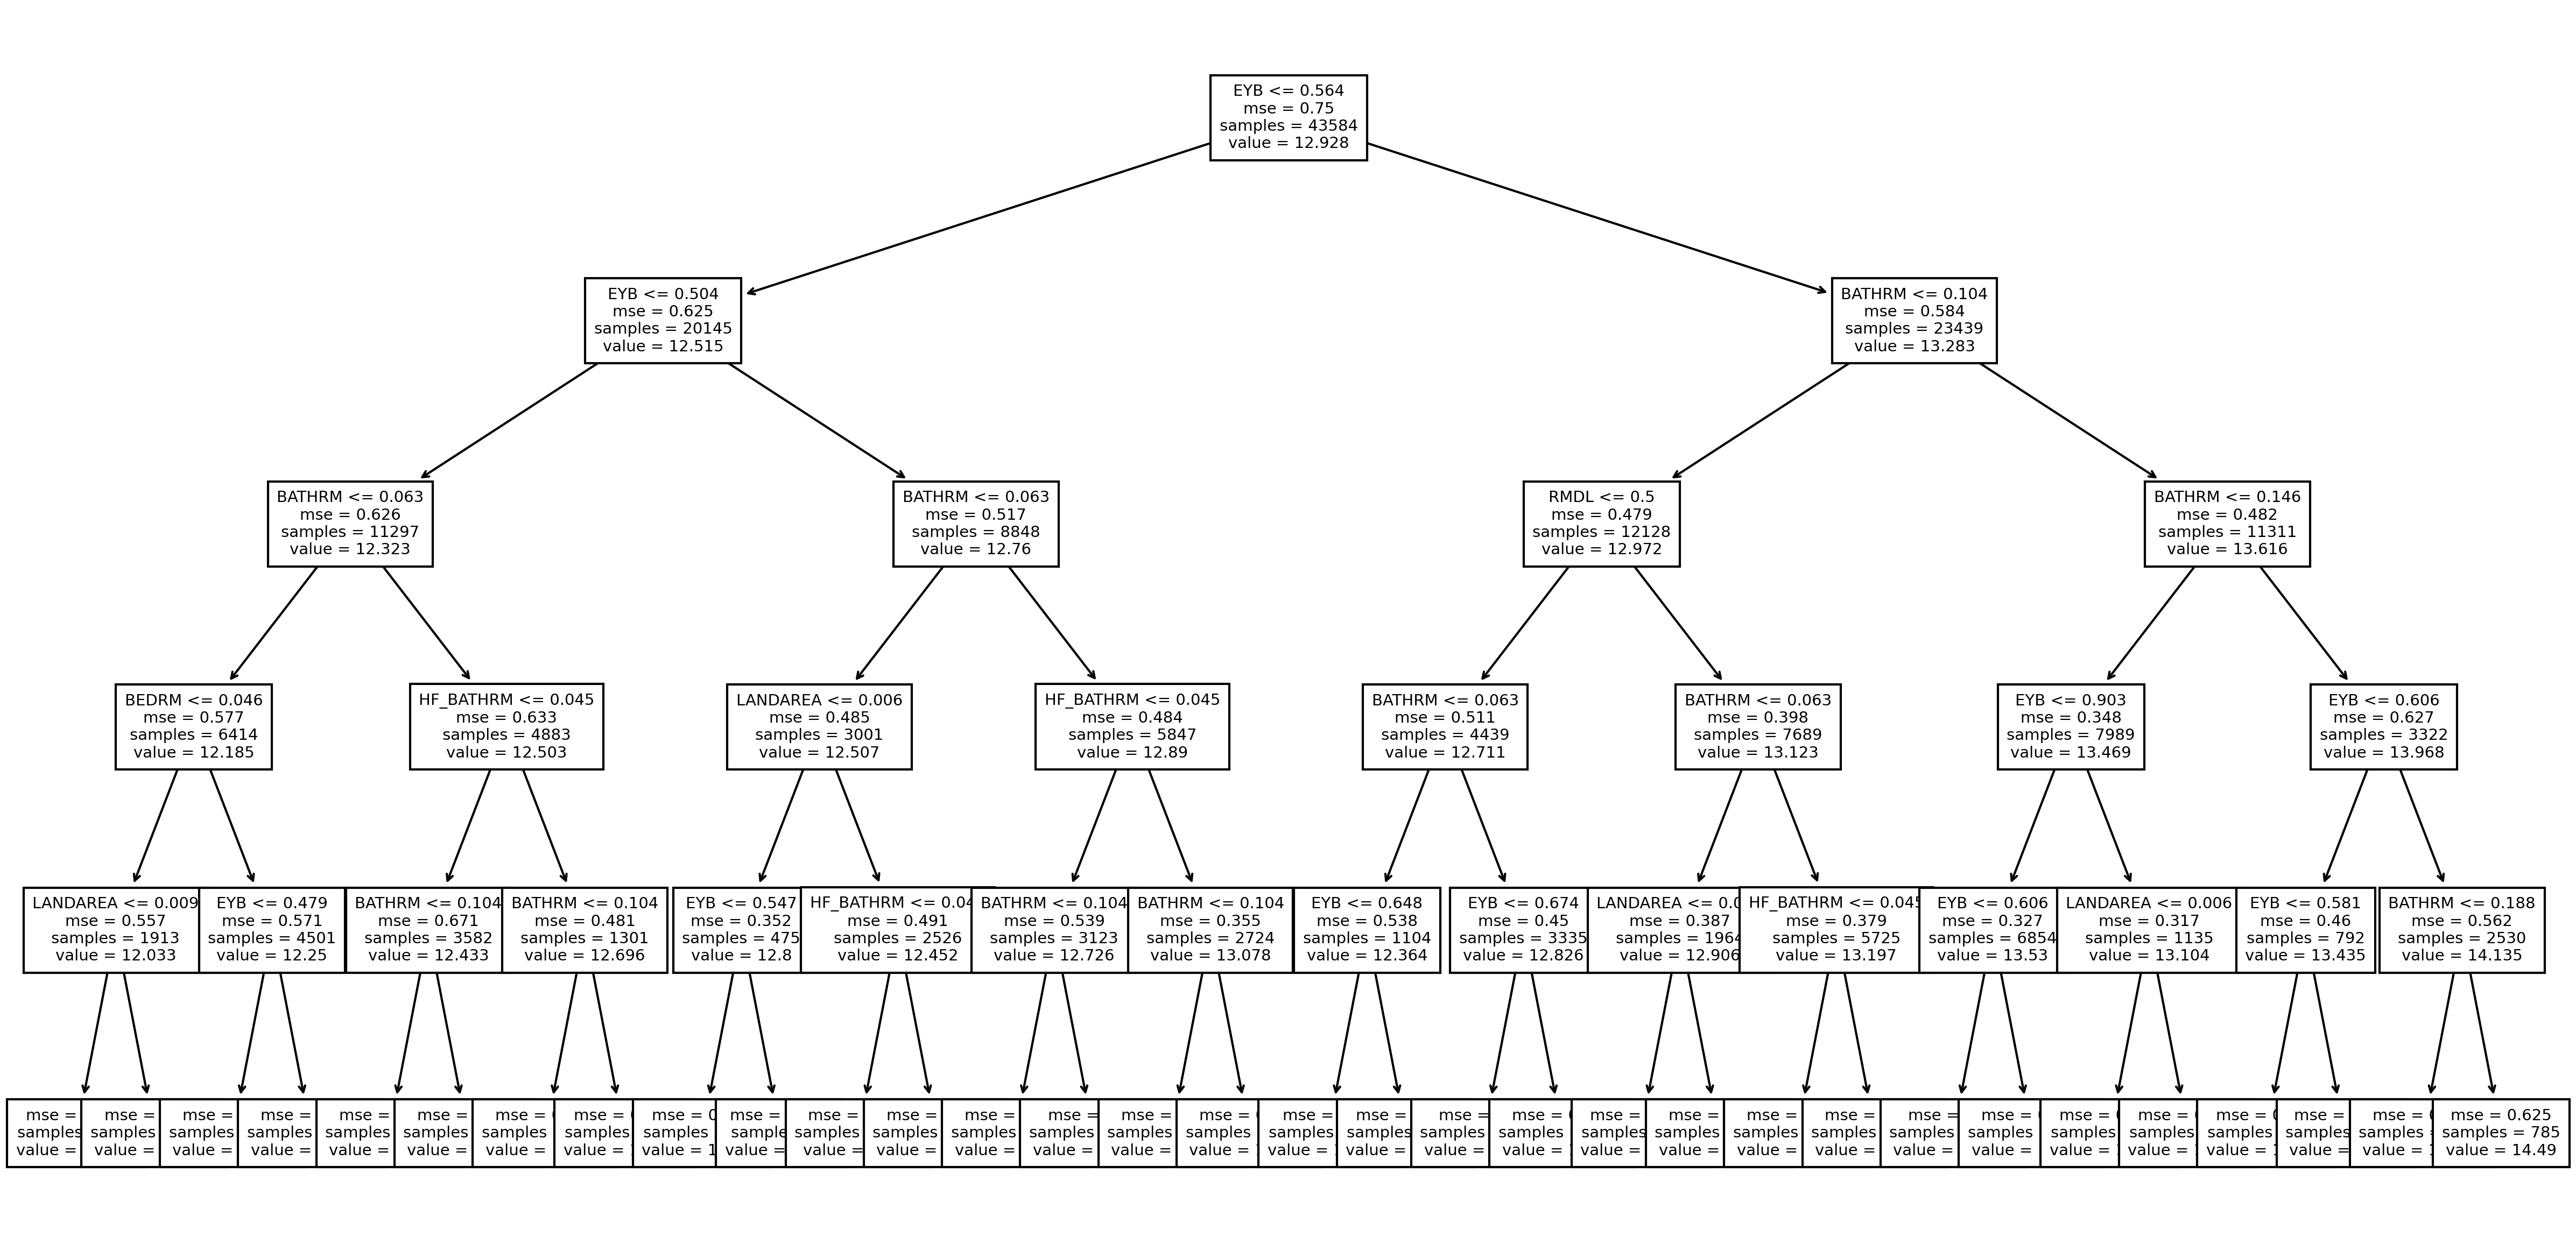

In [125]:
# Plot the tree
plt.figure(figsize = (20,10), dpi =300)
rules = tree.plot_tree(mod,feature_names = col_names,fontsize=7)

#### Bagging

In [126]:
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

#### Random Forest

In [127]:
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

### Compare models

In [128]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores


,Model,MSE
0,lm,0.501630
1,lm,0.467226
2,lm,0.486283
3,lm,0.461069
4,lm,0.462301
5,knn,0.489104
6,knn,0.450830
7,knn,0.453329
8,knn,0.450507
9,knn,0.442442


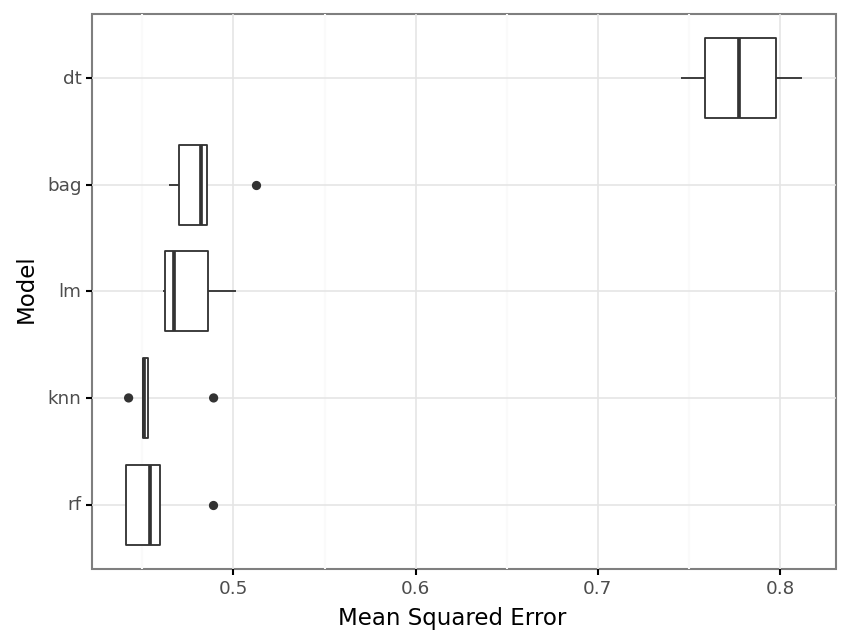

<ggplot: (8783129890807)>

In [130]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())
# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_bw() +
    theme(dpi=150)
)

The decision tree seems to do terribly. Random forest & K nearest look to be doing pretty well. 

Next, I will tune the models

### Tune K-nearest neighbors

In [141]:
knn_tune_params = {'n_neighbors':list(range(5,100,5))}

In [142]:
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [143]:
tune_knn.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95]},
             scoring='neg_mean_squared_error')

In [144]:
tune_knn.best_params_

{'n_neighbors': 25}

In [145]:
tune_knn.best_score_

-0.417173850569241

Let's try with a list of numbers from 20 to 30.

In [157]:
knn_tune_params = {'n_neighbors':list(range(20,31,1))}

In [158]:
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)
tune_knn.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30]},
             scoring='neg_mean_squared_error')

In [159]:
tune_knn.best_params_

{'n_neighbors': 27}

In [160]:
tune_knn.best_score_

-0.4171562750358845

27 is best, but it's so close to 25.

### Tune decision tree

In [146]:
tune_dt = GridSearchCV(DTree(),{'max_depth':[i for i in range(10)]},
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [147]:
tune_dt.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [148]:
tune_dt.best_params_

{'max_depth': 7}

In [149]:
tune_dt.best_score_

-0.4271957995615976

With a max depth of 7, decision tree gets pretty close to KNN.

### Tune Random Forest

In [161]:
RF().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [196]:
rf_params = {'max_depth':[9,10,11],
             'n_estimators':[100,200,300],
              'max_features': [1,2,3,4,5]} 
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)

In [197]:
tune_rf.fit(train_X,train_y) 

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [9, 10, 11], 'max_features': [4],
                         'n_estimators': [300]},
             scoring='neg_mean_squared_error')

In [198]:
tune_rf.best_params_

{'max_depth': 11, 'max_features': 4, 'n_estimators': 300}

In [199]:
tune_rf.best_score_

-0.39357406484051294

As I increase max depths, max features & n_estimators, the fit is better, but my computer is taking a long time to run this.

### Modeling pipeline

In [200]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ["BATHRM","HF_BATHRM","BEDRM","EYB","RMDL","LANDAREA","KITCHENS","HEAT"])])
# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':list(range(5,100,5))},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,4,5,6,7,8,9,10]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[9,10,11],
     'model__max_features': [1,2,3,4,5],
     'model__n_estimators':[100,200,300]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BATHRM',
                                                                          'HF_BATHRM',
                                                                          'BEDRM',
                                                                          'EYB',
                                                                          'RMDL',
                                                                          'LANDAREA',
                                                                          'KITCHENS',
                                                                          'HEAT'])])),
                                 

In [201]:
search.best_score_ # Mean out-of-sample (CV) error

-0.39339100491786194

In [202]:
search.best_params_

{'model': RandomForestRegressor(max_depth=11, max_features=4, n_estimators=300),
 'model__max_depth': 11,
 'model__max_features': 4,
 'model__n_estimators': 300}

## Test performace

In [240]:
# Read in the test dataset
test = pd.read_csv("../test_data.csv")

# Run rmdl() on it to create RMDL
rmdl(test)

In [241]:
# Drop NA
test = test[["BATHRM","HF_BATHRM","BEDRM","EYB","RMDL","LANDAREA","KITCHENS","HEAT","LN_PRICE"]].dropna()

In [242]:
# test_X and test_y
test_X = test[["BATHRM","HF_BATHRM","BEDRM","EYB","RMDL","LANDAREA","KITCHENS","HEAT"]]
test_y = test[["LN_PRICE"]]

In [243]:
# Scale the variables in test_X
scaler = pp.MinMaxScaler()
col_names = list(test_X)
test_X = scaler.fit_transform(test_X)
test_X = pd.DataFrame(test_X,columns=col_names)

In [244]:
# Use predict() on the test dataset
pred_y = search.predict(test_X)

In [245]:
m.mean_squared_error(test_y,pred_y)

0.5610256030966184

In [246]:
m.r2_score(test_y,pred_y)

0.2413312615752773

My model does pretty badly, considering the fact the Professor Dunford had 3 parameters in his, yet a better MSE and similar R-squared to mine.